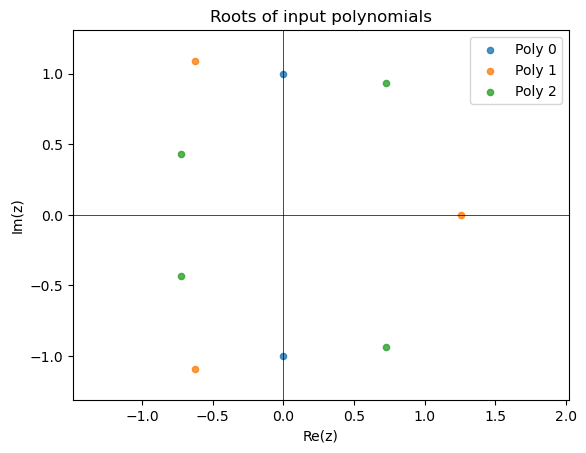

Numerical roots:
Polynomial 0: [-1j, 1j]
Polynomial 1: [(1.2599210498948732+0j), (-0.6299605249474366-1.0911236359717214j), (-0.6299605249474366+1.0911236359717214j)]
Polynomial 2: [(-0.7271360844911968-0.4300142883297158j), (-0.7271360844911968+0.4300142883297158j), (0.7271360844911968-0.9340992894605294j), (0.7271360844911968+0.9340992894605294j)]


In [20]:
# SageMath / Python code

import matplotlib.pyplot as plt

def plot_polynomial_roots(poly_list, prec=50, point_size=40):
    """
    Input:
        poly_list  : list of Sage polynomials over QQ
        prec       : decimal precision for root approximation
        point_size : size of scatter plot markers
    Output:
        (roots_list, plot)
        roots_list is a list of lists of approximate complex roots
    """

    # distinct colors per polynomial
    colors = plt.cm.tab10.colors  # up to 10 distinct
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]
    
    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots
    for idx, p in enumerate(poly_list):
        # numerical roots, using the complex field
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # add padding (10%)
    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    # axes + legend
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.legend()
    plt.title("Roots of input polynomials")
    plt.show()

    return all_roots


# Example usage:
R.<x> = QQ[]
polys = [x^2 + 1, x^3 - 2, x^4 + x + 1]

# try smaller points`
roots = plot_polynomial_roots(polys, point_size=20)

print("Numerical roots:")
for i, rs in enumerate(roots):
    print(f"Polynomial {i}: {rs}")


n: 1
x - 24
n: 2
x^2 - 48*x + 504
n: 3
x^3 - 72*x^2 + 1512*x - 8832
n: 4
x^4 - 96*x^3 + 3024*x^2 - 35328*x + 115920


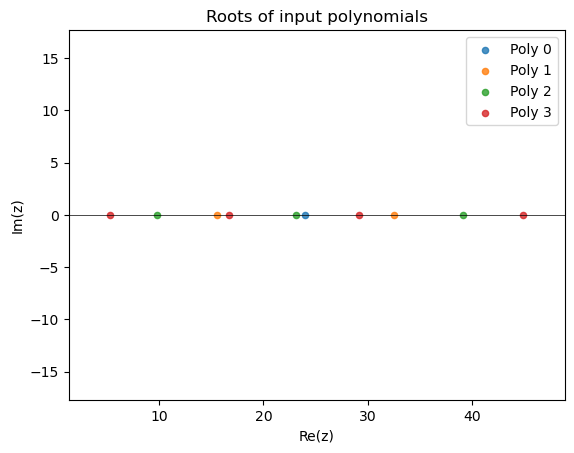

Numerical roots:
Polynomial 0: [(24+0j)]
Polynomial 1: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 2: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 3: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]


In [7]:
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
Rx.<x> = QQ[]
char_polys=[]
for n in range(1,5):
    lst=[]
    for k in range(0,n+1):
        lst+=[factorial(n)*nieburTau(n-k+1)*x^k/factorial(k)]
    al=Rx(add(lst))
    print("n:",n)
    print(factor(al))
    char_polys+=[(n,al)]

import matplotlib.pyplot as plt
poly_list=[poly[1] for poly in char_polys]
def plot_polynomial_roots(poly_list, prec=50, point_size=40):
    """
    Input:
        poly_list  : list of Sage polynomials over QQ
        prec       : decimal precision for root approximation
        point_size : size of scatter plot markers
    Output:
        (roots_list, plot)
        roots_list is a list of lists of approximate complex roots
    """

    # distinct colors per polynomial
    colors = plt.cm.tab10.colors  # up to 10 distinct
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]
    
    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots
    for idx, p in enumerate(poly_list):
        # numerical roots, using the complex field
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # add padding (10%)
    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    # axes + legend
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.legend()
    plt.title("Roots of input polynomials")
    plt.show()

    return all_roots


# try smaller points
roots = plot_polynomial_roots(poly_list, point_size=20)

print("Numerical roots:")
for i, rs in enumerate(roots):
    print(f"Polynomial {i}: {rs}")

n: 1
x - 24
n: 2
x^2 - 48*x + 504
n: 3
x^3 - 72*x^2 + 1512*x - 8832
n: 4
x^4 - 96*x^3 + 3024*x^2 - 35328*x + 115920
n: 5
x^5 - 120*x^4 + 5040*x^3 - 88320*x^2 + 579600*x - 725760
n: 6
x^6 - 144*x^5 + 7560*x^4 - 176640*x^3 + 1738800*x^2 - 4354560*x - 12055680
n: 7
x^7 - 168*x^6 + 10584*x^5 - 309120*x^4 + 4057200*x^3 - 15240960*x^2 - 84389760*x + 425779200
n: 8
x^8 - 192*x^7 + 14112*x^6 - 494592*x^5 + 8114400*x^4 - 40642560*x^3 - 337559040*x^2 + 3406233600*x - 4582085760
n: 9
x^9 - 216*x^8 + 18144*x^7 - 741888*x^6 + 14605920*x^5 - 91445760*x^4 - 1012677120*x^3 + 15328051200*x^2 - 41238771840*x - 42065049600
n: 10
x^10 - 240*x^9 + 22680*x^8 - 1059840*x^7 + 24343200*x^6 - 182891520*x^5 - 2531692800*x^4 + 51093504000*x^3 - 206193859200*x^2 - 420650496000*x + 1940000025600
n: 11
x^11 - 264*x^10 + 27720*x^9 - 1457280*x^8 + 38253600*x^7 - 335301120*x^6 - 5569724160*x^5 + 140507136000*x^4 - 756044150400*x^3 - 2313577728000*x^2 + 21340000281600*x - 14806897459200
n: 12
x^12 - 288*x^11 + 33264*x^1

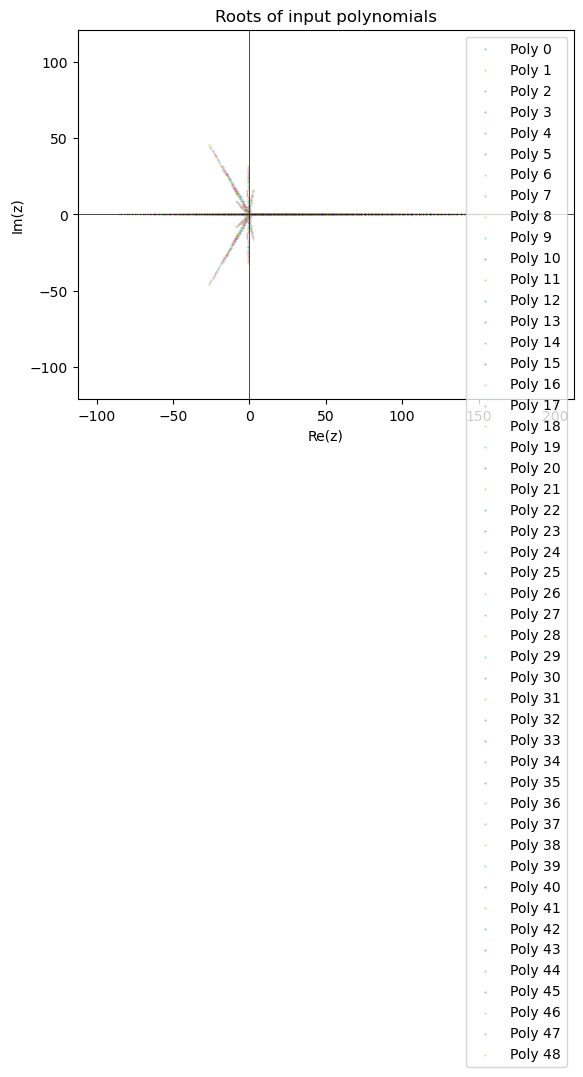

Numerical roots:
Polynomial 0: [(24+0j)]
Polynomial 1: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 2: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 3: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 4: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 5: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 6: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 7: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0

In [20]:
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
Rx.<x> = QQ[]
char_polys=[]
for n in range(1,50):
    lst=[]
    for k in range(0,n+1):
        lst+=[factorial(n)*nieburTau(n-k+1)*x^k/factorial(k)]
    al=Rx(add(lst))
    print("n:",n)
    print(factor(al))
    char_polys+=[(n,al)]

import matplotlib.pyplot as plt
poly_list=[poly[1] for poly in char_polys]
def plot_polynomial_roots(poly_list, prec=50, point_size=40):
    """
    Input:
        poly_list  : list of Sage polynomials over QQ
        prec       : decimal precision for root approximation
        point_size : size of scatter plot markers
    Output:
        (roots_list, plot)
        roots_list is a list of lists of approximate complex roots
    """

    # distinct colors per polynomial
    colors = plt.cm.tab10.colors  # up to 10 distinct
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]
    
    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots
    for idx, p in enumerate(poly_list):
        # numerical roots, using the complex field
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # add padding (10%)
    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    # axes + legend
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.legend()
    plt.title("Roots of input polynomials")
    plt.show()

    return all_roots

# try smaller points
roots = plot_polynomial_roots(poly_list, point_size=.1)

print("Numerical roots:")
for i, rs in enumerate(roots):
    print(f"Polynomial {i}: {rs}")

In [14]:
sizes=[abs(root[0]) for root in roots]
sizes=flatten(sizes)
min(sizes)

1.5879051454191078

In [15]:
roots[1]

[(15.51471862576143+0j), (32.48528137423857+0j)]

In [16]:
roots[1][0]

(15.51471862576143+0j)

In [17]:
2*1.5879051454191078

3.175810290838216

In [18]:
sin(1.5879051454191078)

0.9998536477326123

In [19]:
sin(pi/2)

1

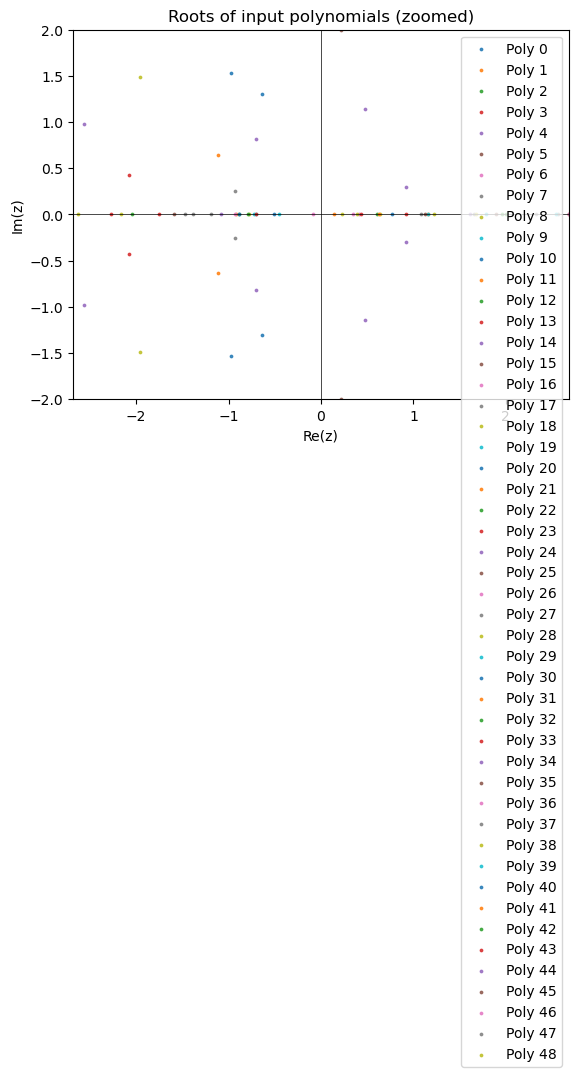

Numerical roots:
Polynomial 0: [(24+0j)]
Polynomial 1: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 2: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 3: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 4: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 5: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 6: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 7: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0

In [35]:
roots=[]
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
Rx.<x> = QQ[]
char_polys=[]
for n in range(1,50):
    lst=[]
    for k in range(0,n+1):
        lst+=[factorial(n)*nieburTau(n-k+1)*x^k/factorial(k)]
    al=Rx(add(lst))
    char_polys+=[(n,al)]

import matplotlib.pyplot as plt
poly_list=[poly[1] for poly in char_polys]
def plot_polynomial_roots(poly_list, prec=50, point_size=40,
                          x_range=(-2, 2), y_range=(-2, 2)):
    """
    Input:
        poly_list : list of Sage polynomials over QQ
        prec      : decimal precision for root approximation
        point_size: size of scatter plot markers
        x_range   : (xmin, xmax) for plotting region
        y_range   : (ymin, ymax) for plotting region
    """
    colors = plt.cm.tab10.colors
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]
    
    all_roots = []

    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=point_size, alpha=0.8)

    # fixed window around origin
    plt.xlim(*x_range)
    plt.ylim(*y_range)

    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.legend()
    plt.title("Roots of input polynomials (zoomed)")
    plt.show()

    return all_roots


# try smaller points
roots = plot_polynomial_roots(poly_list, point_size=3)

print("Numerical roots:")
for i, rs in enumerate(roots):
    print(f"Polynomial {i}: {rs}")

In [28]:
sizes=[abs(root[0]) for root in roots]
sizes=flatten(sizes)
min(sizes)

1.5879051454191078

In [31]:
min_modulus = min(abs(z) for poly_roots in roots for z in poly_roots)
min_modulus

0.09188905681071387

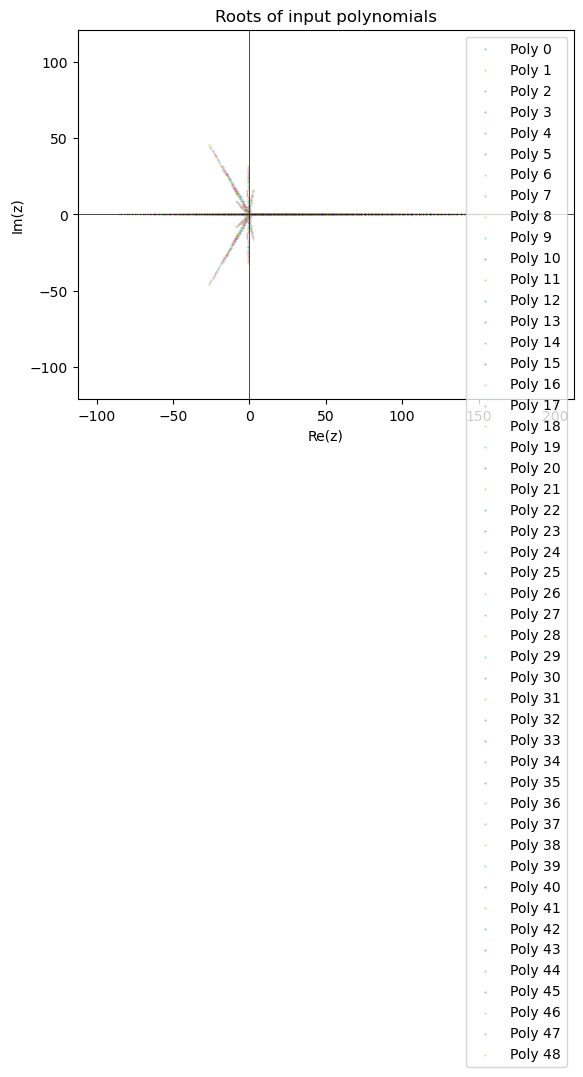

In [36]:
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
Rx.<x> = QQ[]
char_polys=[]
for n in range(1,50):
    lst=[]
    for k in range(0,n+1):
        lst+=[factorial(n)*nieburTau(n-k+1)*x^k/factorial(k)]
    al=Rx(add(lst))
    char_polys+=[(n,al)]

import matplotlib.pyplot as plt
poly_list=[poly[1] for poly in char_polys]
def plot_polynomial_roots(poly_list, prec=50, point_size=40):
    """
    Input:
        poly_list  : list of Sage polynomials over QQ
        prec       : decimal precision for root approximation
        point_size : size of scatter plot markers
    Output:
        (roots_list, plot)
        roots_list is a list of lists of approximate complex roots
    """

    # distinct colors per polynomial
    colors = plt.cm.tab10.colors  # up to 10 distinct
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]
    
    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots
    for idx, p in enumerate(poly_list):
        # numerical roots, using the complex field
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # add padding (10%)
    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    # axes + legend
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.legend()
    plt.title("Roots of input polynomials")
    plt.show()

    return all_roots

# try smaller points
roots = plot_polynomial_roots(poly_list, point_size=.1)

List of (n, minimum modulus of roots):
(1, 24.0)
(2, 15.51471862576143)
(3, 9.76947373592307)
(4, 5.311407193257731)
(5, 1.6139147917042145)
(6, 1.5879051454191078)
(7, 4.452247447818993)
(8, 1.6543137021601517)
(9, 0.7819585164559925)
(10, 2.924471957443948)
(11, 0.7726489455793519)
(12, 0.9189342624542549)
(13, 0.6098637801064191)
(14, 2.1236284155283727)
(15, 1.0808577624779006)
(16, 2.686418138218155)
(17, 0.4089624855388881)
(18, 1.3840647433211415)
(19, 0.6419537162281324)
(20, 0.4494782083873043)
(21, 1.4537922647476793)
(22, 1.1549351855455312)
(23, 0.885846699590927)
(24, 0.9151869968984279)
(25, 0.9639294686051301)
(26, 2.0801097728610833)
(27, 0.3454272957235573)
(28, 1.4686478167810169)
(29, 0.22374519478061045)
(30, 0.7281985285739265)
(31, 1.8179207179462111)
(32, 0.6297832649515384)
(33, 0.7953135915314384)
(34, 0.42918685818601193)
(35, 1.2321835833027723)
(36, 1.12491383996638)
(37, 0.9274791614508339)
(38, 0.9680874923903143)
(39, 1.2187416442540686)
(40, 0.6986475701

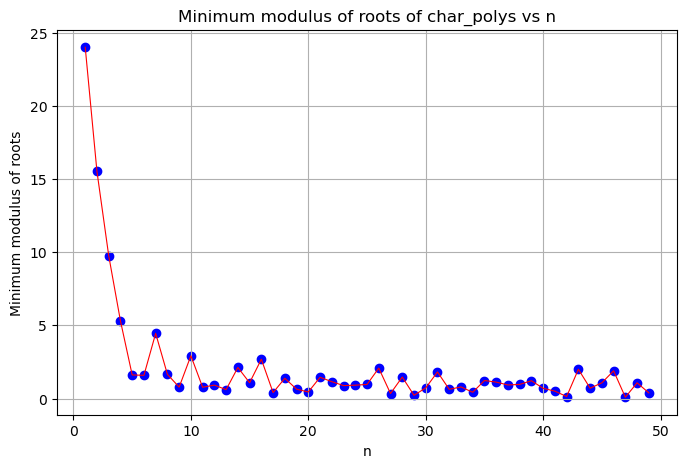

In [33]:
import matplotlib.pyplot as plt

# char_polys is assumed to be a list of tuples (n, polynomial)
min_moduli_list = []
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
Rx.<x> = QQ[]
char_polys=[]
for n in range(1,50):
    lst=[]
    for k in range(0,n+1):
        lst+=[factorial(n)*nieburTau(n-k+1)*x^k/factorial(k)]
    al=Rx(add(lst))
    char_polys+=[(n,al)]
for n, poly in char_polys:
    # compute numerical roots in complex field
    roots = [complex(r) for r in poly.roots(ring=CC, multiplicities=False)]
    
    if roots:  # avoid empty root lists
        min_modulus = min(abs(z) for z in roots)
    else:
        min_modulus = None  # or 0, if preferred
    
    min_moduli_list.append((n, min_modulus))

# Display the list of (n, min_modulus)
print("List of (n, minimum modulus of roots):")
for pair in min_moduli_list:
    print(pair)

# Extract data for plotting
n_values = [pair[0] for pair in min_moduli_list]
min_values = [pair[1] for pair in min_moduli_list]

# Plot min_modulus vs n
plt.figure(figsize=(8,5))
plt.scatter(n_values, min_values, color='blue')
plt.plot(n_values, min_values, color='red', lw=0.8)
plt.xlabel("n")
plt.ylabel("Minimum modulus of roots")
plt.title("Minimum modulus of roots of char_polys vs n")
plt.grid(True)
plt.show()


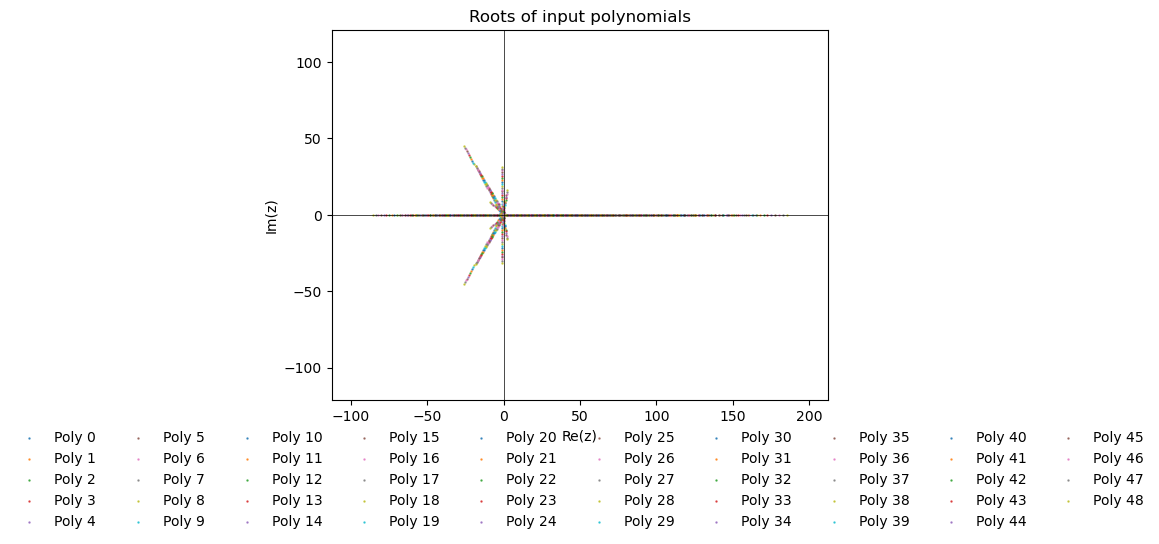

In [38]:
import matplotlib.pyplot as plt

def plot_polynomial_roots(poly_list, prec=50, point_size=40):
    """
    Input:
        poly_list  : list of Sage polynomials over QQ
        prec       : decimal precision for root approximation
        point_size : size of scatter plot markers
    Output:
        (roots_list, plot)
        roots_list is a list of lists of approximate complex roots
    """

    colors = plt.cm.tab10.colors  # up to 10 distinct colors
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]

    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(len(poly_list), 10), frameon=False)

    plt.title("Roots of input polynomials")
    plt.show()

    return all_roots

# try smaller points
roots = plot_polynomial_roots(poly_list, point_size=.5)


In [41]:
import matplotlib.pyplot as plt
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)
Rx.<x> = QQ[]
char_polys=[]
for n in range(1,50):
    lst=[]
    for k in range(0,n+1):
        lst+=[factorial(n)*nieburTau(n-k+1)*x^k/factorial(k)]
    al=Rx(add(lst))
    char_polys+=[(n,al)]

import matplotlib.pyplot as plt
poly_list=[poly[1] for poly in char_polys]
def plot_polynomial_roots(poly_list, plot_point_size=1, legend_point_size=40):
    """
    Plot roots of polynomials with adjustable point sizes in plot and legend.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
    Output:
        all_roots       : list of lists of numerical roots
    """
    colors = plt.cm.tab10.colors
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]

    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal, with separate point size
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(len(poly_list),10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size/plot_point_size)

    plt.title("Roots of input polynomials")
    plt.show()

    return all_roots


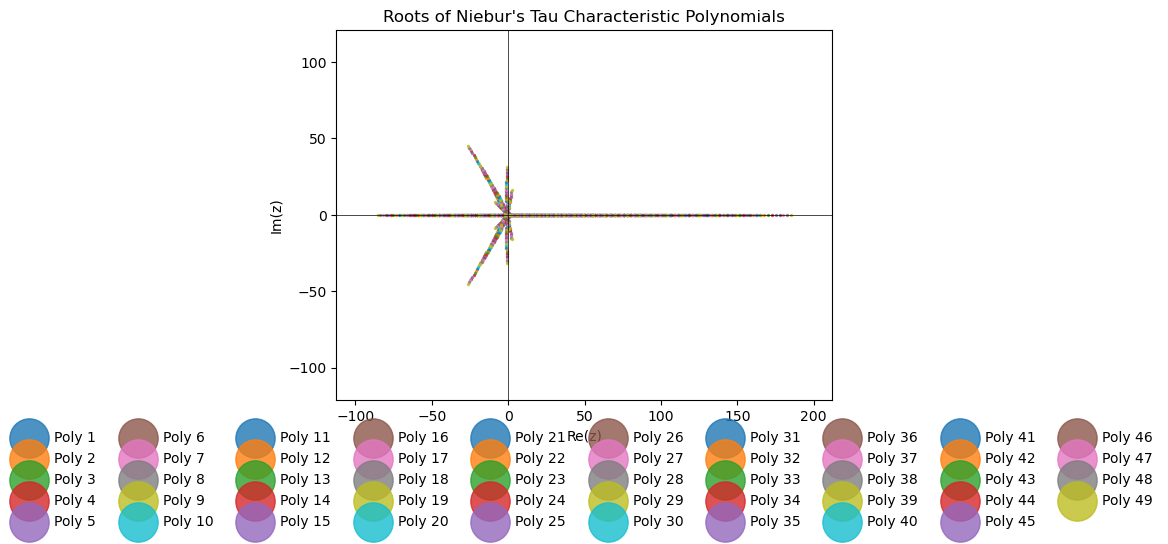

Polynomial 1: [(24+0j)]
Polynomial 2: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 3: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 4: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 5: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 6: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 7: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 8: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0j)]
Polynomial 9:

In [44]:
import matplotlib.pyplot as plt

# --- 1. Define Niebur's tau function ---
def nieburTau(n):
    """
    Compute Ramanujan's tau function using Niebur's formula.
    """
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2

    def step2(n, k):
        return sigma(k) * sigma(n - k)

    def step3(n):
        ans = 0
        for k in [1..n-1]:
            ans += step1(n, k) * step2(n, k)
        return 24*ans

    return n^4 * sigma(n) - step3(n)


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(1, 50):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * nieburTau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))


# --- 3. Plotting function with adjustable point sizes ---
def plot_polynomial_roots(poly_list, plot_point_size=1, legend_point_size=5):
    """
    Plot roots of polynomials with adjustable point sizes in plot and legend.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
    Output:
        all_roots       : list of lists of numerical roots
    """
    colors = plt.cm.tab10.colors
    if len(poly_list) > 10:
        color_cycle = [colors[i % 10] for i in range(len(poly_list))]
    else:
        color_cycle = colors[:len(poly_list)]

    all_roots = []
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # bounding box with 10% padding
    dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
    dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
    plt.xlim(xmin - dx, xmax + dx)
    plt.ylim(ymin - dy, ymax + dy)

    # axes, aspect, and labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal, with scaled points
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(len(poly_list), 10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    plt.title("Roots of Niebur's Tau Characteristic Polynomials")
    plt.show()

    return all_roots


# --- 4. Run the plot ---
poly_list = [poly[1] for poly in char_polys]

# Example: plot with points of size 2 and legend points 40
roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40)

# Optional: inspect numerical roots
for i, rs in enumerate(roots):
    print(f"Polynomial {i+1}: {rs}")


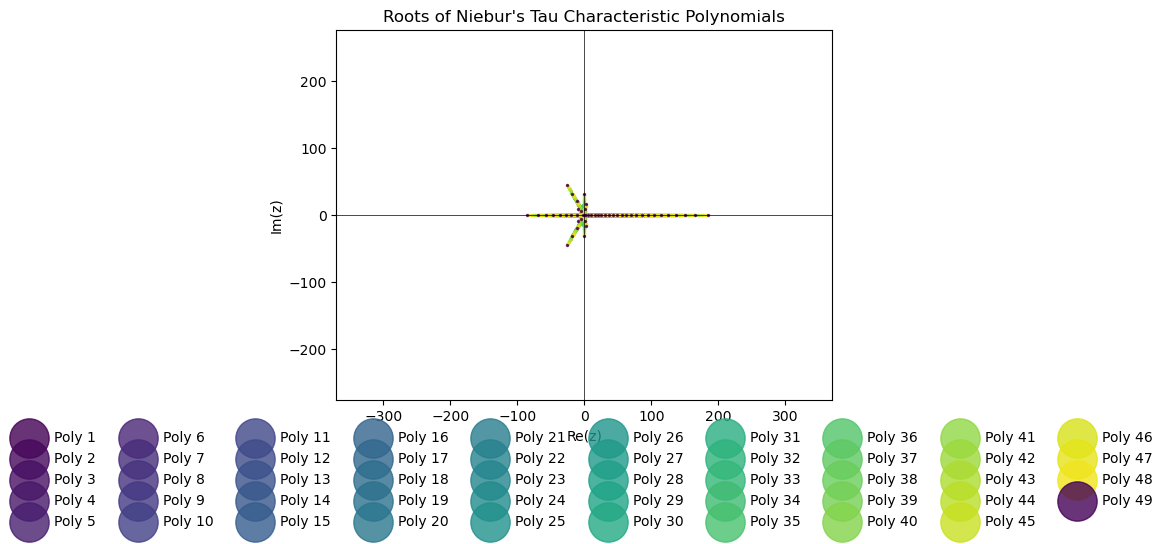

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define Niebur's tau function ---
def nieburTau(n):
    """
    Compute Ramanujan's tau function using Niebur's formula.
    """
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2

    def step2(n, k):
        return sigma(k) * sigma(n - k)

    def step3(n):
        ans = 0
        for k in [1..n-1]:
            ans += step1(n, k) * step2(n, k)
        return 24*ans

    return n^4 * sigma(n) - step3(n)


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(1, 50):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * nieburTau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))


# --- 3. Plotting function with unique colors and scaling modes ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox"):
    """
    Plot roots of polynomials with adjustable point sizes and unique colors.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    color_cycle = [plt.cm.viridis(i / max(n_poly-1, 1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- 4. Axis scaling based on mode ---
    if mode == "bbox":
        # tight bounding box with 10% padding
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        # square plot centered at origin, radius = 2 * max modulus
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, and labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal, with scaled points
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(n_poly, 10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    plt.title("Roots of Niebur's Tau Characteristic Polynomials")
    plt.show()

    return all_roots


# --- 5. Run the plot ---
poly_list = [poly[1] for poly in char_polys]

# Example: plot with "radius" mode
roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="radius")

# Optional: inspect numerical roots
#for i, rs in enumerate(roots):
#    print(f"Polynomial {i+1}: {rs}")


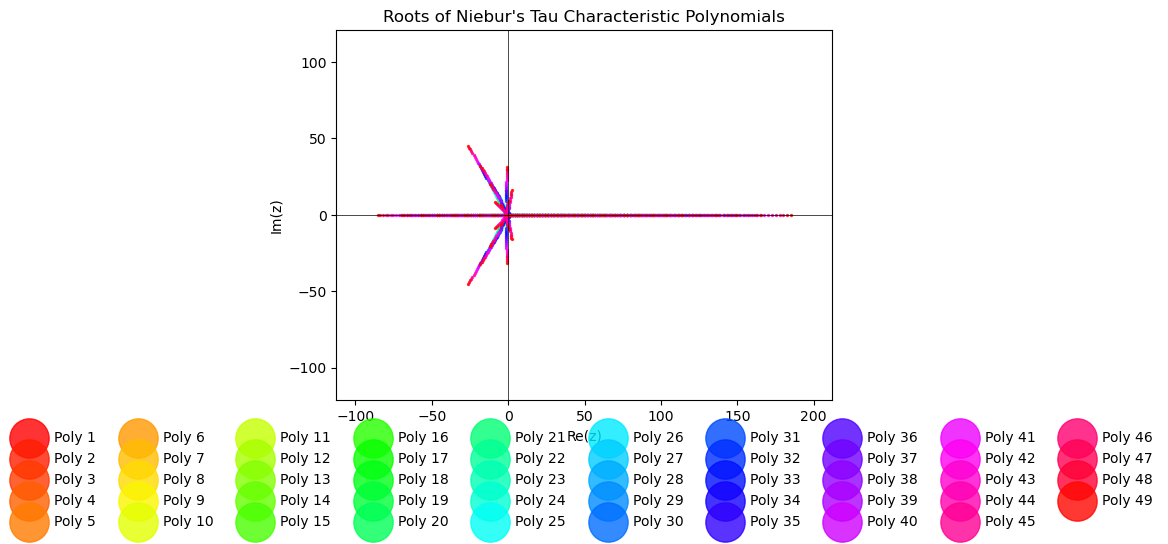

Polynomial 1: [(24+0j)]
Polynomial 2: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 3: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 4: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 5: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 6: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 7: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 8: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0j)]
Polynomial 9:

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define Niebur's tau function ---
def nieburTau(n):
    """
    Compute Ramanujan's tau function using Niebur's formula.
    """
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2

    def step2(n, k):
        return sigma(k) * sigma(n - k)

    def step3(n):
        ans = 0
        for k in [1..n-1]:
            ans += step1(n, k) * step2(n, k)
        return 24*ans

    return n^4 * sigma(n) - step3(n)


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(1, 50):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * nieburTau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))


# --- 3. Plotting function with HSV hue colors ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox"):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # generate colors covering the full HSV color wheel
    color_cycle = [plt.cm.hsv(i / max(n_poly-1, 1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- 4. Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, and labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal, with scaled points
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(n_poly, 10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    plt.title("Roots of Niebur's Tau Characteristic Polynomials")
    plt.show()

    return all_roots


# --- 4. Run the plot ---
poly_list = [poly[1] for poly in char_polys]

# Example: plot with "radius" mode
roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox")

# Optional: inspect numerical roots
for i, rs in enumerate(roots):
    print(f"Polynomial {i+1}: {rs}")


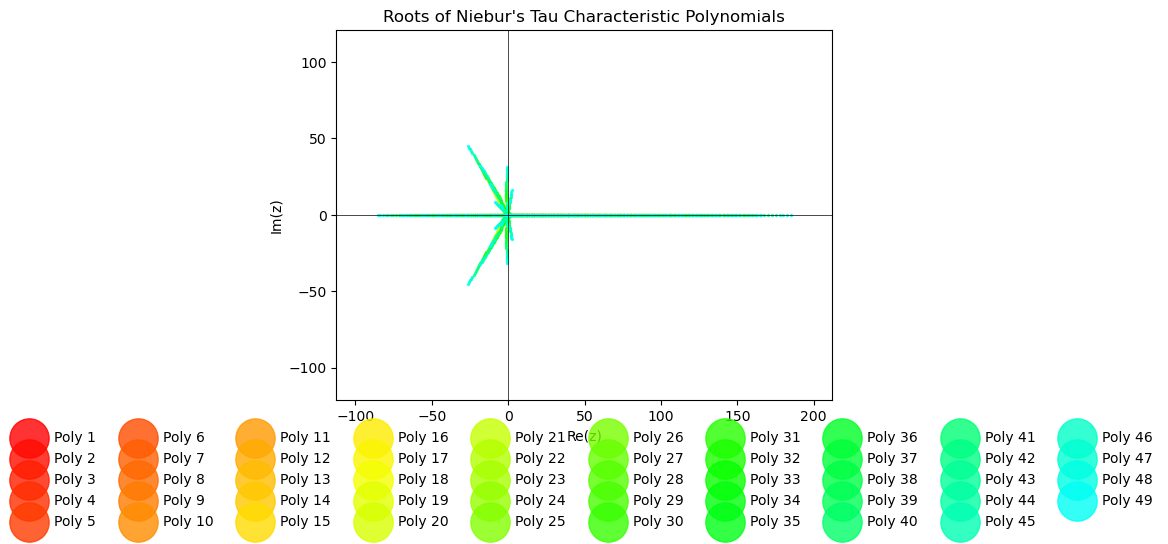

Polynomial 1: [(24+0j)]
Polynomial 2: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 3: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 4: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 5: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 6: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 7: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 8: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0j)]
Polynomial 9:

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define Niebur's tau function ---
def nieburTau(n):
    """
    Compute Ramanujan's tau function using Niebur's formula.
    """
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2

    def step2(n, k):
        return sigma(k) * sigma(n - k)

    def step3(n):
        ans = 0
        for k in [1..n-1]:
            ans += step1(n, k) * step2(n, k)
        return 24*ans

    return n^4 * sigma(n) - step3(n)


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(1, 50):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * nieburTau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))


# --- 3. Plotting function with well-separated HSV colors ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox"):
    """
    Plot roots of polynomials with adjustable point sizes and well-separated HSV colors.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # generate colors spanning only half of the HSV color wheel for better separation
    color_cycle = [plt.cm.hsv(0.5 * i / max(n_poly-1, 1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- 4. Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, and labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal, with scaled points
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(n_poly, 10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    plt.title("Roots of Niebur's Tau Characteristic Polynomials")
    plt.show()

    return all_roots


# --- 4. Run the plot ---
poly_list = [poly[1] for poly in char_polys]

# Example: plot with "radius" mode
# or bbox
roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox")

# Optional: inspect numerical roots
for i, rs in enumerate(roots):
    print(f"Polynomial {i+1}: {rs}")


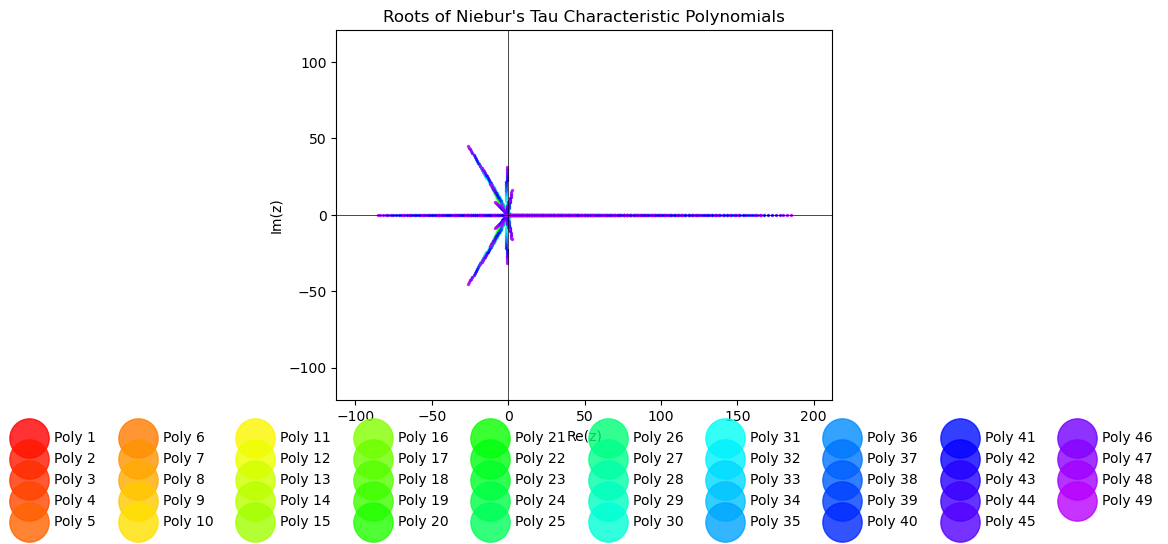

Polynomial 1: [(24+0j)]
Polynomial 2: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 3: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 4: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 5: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 6: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 7: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 8: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0j)]
Polynomial 9:

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define Niebur's tau function ---
def nieburTau(n):
    """
    Compute Ramanujan's tau function using Niebur's formula.
    """
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2

    def step2(n, k):
        return sigma(k) * sigma(n - k)

    def step3(n):
        ans = 0
        for k in [1..n-1]:
            ans += step1(n, k) * step2(n, k)
        return 24*ans

    return n^4 * sigma(n) - step3(n)


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(1, 50):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * nieburTau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))


# --- 3. Plotting function with improved HSV spacing ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox"):
    """
    Plot roots of polynomials with adjustable point sizes and well-separated HSV colors.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing: 0 → 0.8 of hue to avoid wrap-around similarity
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- 4. Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, and labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot, horizontal, with scaled points
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(n_poly, 10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    plt.title("Roots of Niebur's Tau Characteristic Polynomials")
    plt.show()

    return all_roots


# --- 4. Run the plot ---
poly_list = [poly[1] for poly in char_polys]

# Example: plot with "radius" mode
roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, mode="bbox")

# Optional: inspect numerical roots
for i, rs in enumerate(roots):
    print(f"Polynomial {i+1}: {rs}")


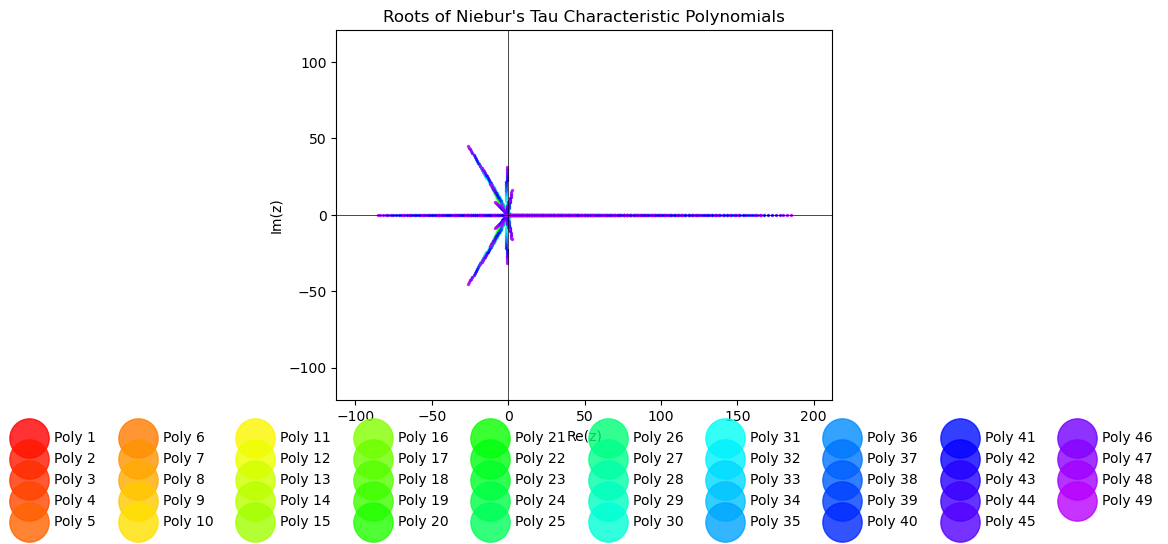

Polynomial 1: [(24+0j)]
Polynomial 2: [(15.51471862576143+0j), (32.48528137423857+0j)]
Polynomial 3: [(9.76947373592307+0j), (23.107823361077802+0j), (39.12270290299912+0j)]
Polynomial 4: [(5.311407193257731+0j), (16.707798571888468+0j), (29.114501527123444+0j), (44.86629270773036+0j)]
Polynomial 5: [(1.6139147917042145+0j), (11.788676428920464+0j), (22.174567473848647+0j), (34.36594815590259+0j), (50.05689314962408+0j)]
Polynomial 6: [(-1.5879051454191078+0j), (7.802709250520744+0j), (16.786716844058347+0j), (26.987813465867525+0j), (39.14856101060372+0j), (54.86210457436877+0j)]
Polynomial 7: [(-4.452247447818993+0j), (4.4783000503644015+0j), (12.388207359591414+0j), (21.201921124908946+0j), (31.402833757889283+0j), (43.60209728534168+0j), (59.37888786972327+0j)]
Polynomial 8: [(-7.0830403425336526+0j), (1.6543137021601517+0j), (8.703141989855865+0j), (16.430446280034687+0j), (25.28002861712985+0j), (35.53821213931164+0j), (47.80762853239511+0j), (63.66926908164635+0j)]
Polynomial 9:

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define Niebur's tau function ---
def nieburTau(n):
    """
    Compute Ramanujan's tau function using Niebur's formula.
    """
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2

    def step2(n, k):
        return sigma(k) * sigma(n - k)

    def step3(n):
        ans = 0
        for k in [1..n-1]:
            ans += step1(n, k) * step2(n, k)
        return 24*ans

    return n^4 * sigma(n) - step3(n)


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(1, 50):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * nieburTau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))


# --- 3. Plotting function with HSV hue colors and PDF save ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                          mode="bbox", save_path=None, show_plot=True):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.
    Can automatically save to PDF for LaTeX.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
        save_path       : if not None, path to save PDF (e.g., 'niebur_roots.pdf')
        show_plot       : if True, display the plot; if False, only save
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing factor to improve distinguishability
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=min(n_poly, 10), frameon=False,
               scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    plt.title("Roots of Niebur's Tau Characteristic Polynomials")

    # --- Save PDF for LaTeX if requested ---
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')  # vector graphics for LaTeX

    # Show plot if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    return all_roots


# --- 4. Run the plot and save as PDF ---
poly_list = [poly[1] for poly in char_polys]

roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                              mode="bbox", save_path="niebur_tau_roots.pdf", show_plot=True)

# Optional: inspect numerical roots
for i, rs in enumerate(roots):
    print(f"Polynomial {i+1}: {rs}")
